In [1]:
import math

MODEL_G = 9.81
MODEL_DT = 0.001


class Body:
    def __init__(self, x, y, vx, vy):
        """
        Создать тело.
        
        Пареметры:
        ----------
        x: float
            горизонтальная координата
        y: float
            вертикальная координата
        vx: float
            горизонтальная скорость
        vy: float
            вертикальная скорость
        """

        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
        self.trajectory_x = []
        self.trajectory_y = []
        

    def advance(self):
        """
        Выполнить шаг мат. модели применительно к телу, предварительно записав его координаты
        """
        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)
        
        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT
        self.vy -= MODEL_G * MODEL_DT

In [153]:
class Rocket(Body):
    def __init__(self, x, y):
        """
        Создать ракету.
        
        Пареметры:
        ----------
        x: float
            горизонтальная координата
        y: float
            вертикальная координата
        """
        super().__init__(x, y, 0.1, 0.1) # Вызовем конструктор предка — тела, т.к. он для ракеты актуален
        pass 
        self.mtop = 20 # масса топлива
        self.mroc = 66 # масса ракеты
        self.a = 30 # ускорение от топлива
        self.deg = 1.5 # угол полета
        self.dtop = 0.01 # изменение топлива за DT
        self.dd = 0.001 # изменение угла поворота ракеты за DT
    

    def advance(self):
        super().advance() # вызовем метод предка — тела, т.к. и он для ракеты актуален.
        pass 
        if self.mtop > 0: # если топливо еще не выгорело
            self.vy += self.a * math.sin(self.deg) * MODEL_DT # изменяем верт. скорость
            self.vx += self.a * math.cos(self.deg) * MODEL_DT # изменяем гор. скорость
            self.a *= ((self.mtop + self.mroc) / (self.mtop + self.mroc - self.dtop )) # изменяем ускорение в связи с уменьшением массы
            self.mtop -= self.dtop  # топливо выгорает
            self.deg -= self.dd # ракета поворачивается по часовой
            if self.mtop < 0: # если топливо выгорело, приравниваем его к нулю
                self.mtop = 0 
               
        if self.mtop == 0: # при выгоревшем топливе отсоединяется ненужный топливный бак, ускоряя ракеты в направлении полета, а затем масса топлива становится -1, чтобы не приггерит6 другие ифы
            self.vy += 10 * math.sin(self.deg)
            self.vx += 10 * math.cos(self.deg)
            self.mtop = -1

In [154]:
import numpy as np

np.sin

b = Body(0, 0, 20, 15)
r = Rocket(0, 0)

bodies = [b, r]
# Дальше мы уже не будем думать, кто тут ёжик, кто ракета, а кто котлета —
# благодаря возможностям ООП будем просто работать со списком тел

for t in np.r_[0:4:MODEL_DT]: # для всех временных отрезков
    for b in bodies: # для всех тел
        b.advance() # выполним шаг

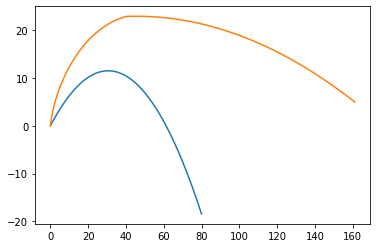

In [155]:
%matplotlib inline
from matplotlib import pyplot as pp

for b in bodies: # для всех тел
    pp.plot(b.trajectory_x, b.trajectory_y) # нарисуем их траектории
    

##### 